# First steps with xmovie

In [1]:
# load modules
import xarray as xr
from xmovie import Movie
%matplotlib inline

In [2]:
# load test dataset
ds = xr.tutorial.open_dataset('air_temperature').isel(time=slice(0,150))
# create movie object
mov = Movie(ds.air)

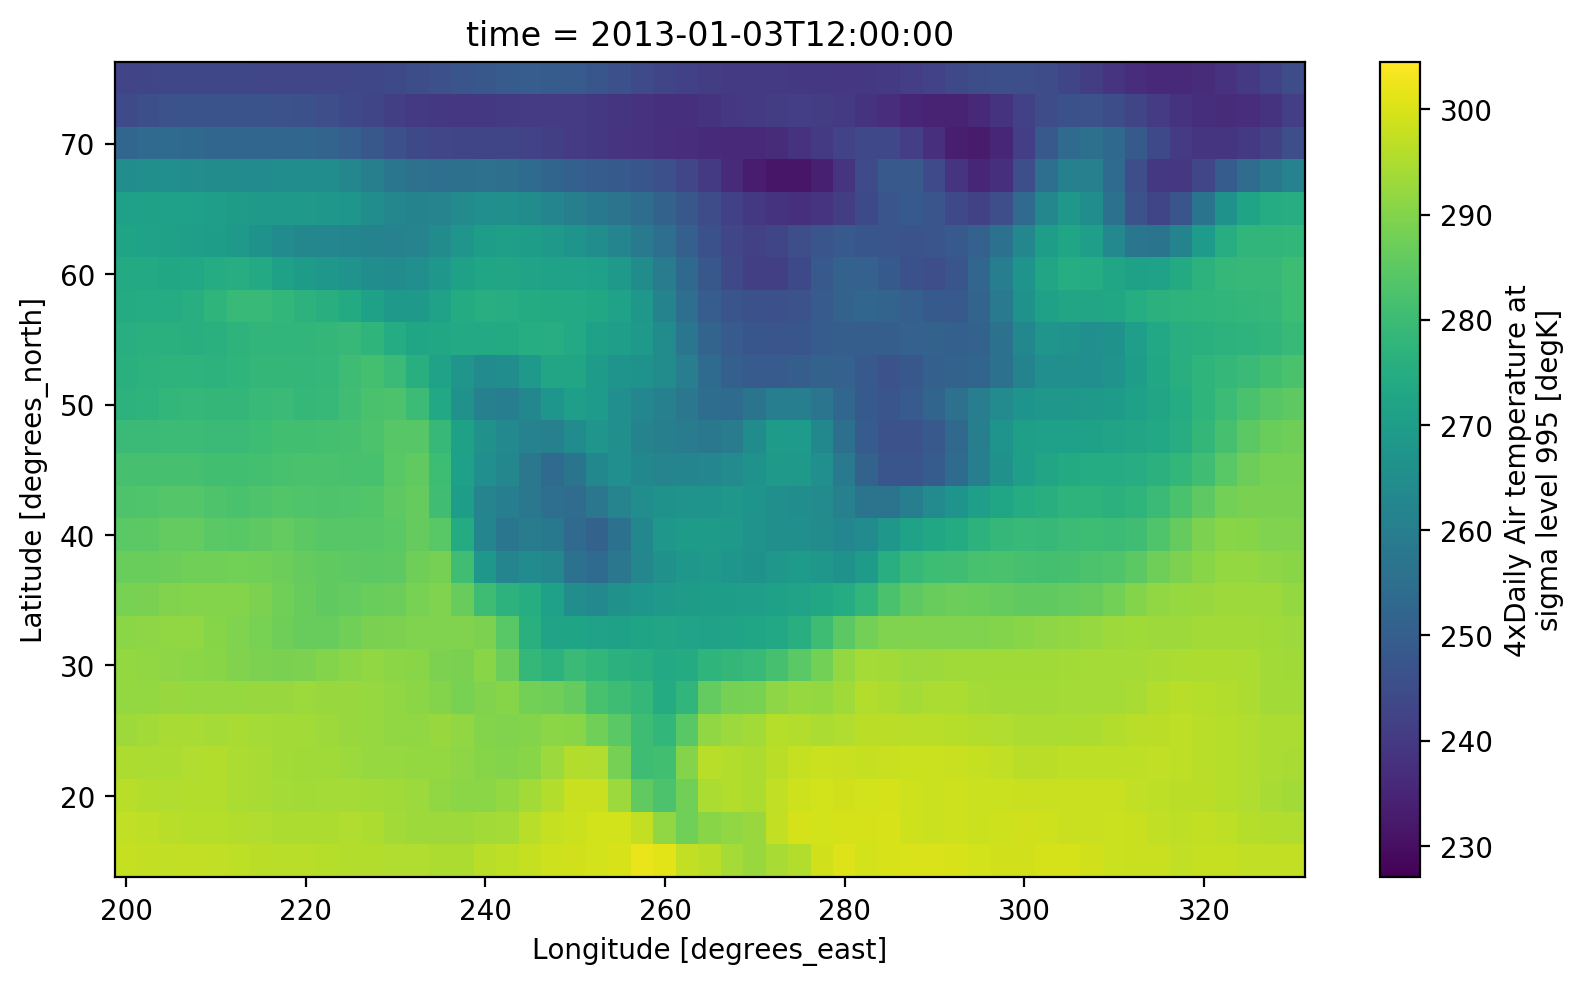

In [4]:
# preview 10th frame
mov.preview(10)

In [6]:
mov.save('movie.mp4')# Use to save a high quality mp4 movie
mov.save('movie_gif.gif') #Use to save a gif

Movie created at movie.mp4
Movie created at movie_mp4.mp4
GIF created at movie_gif.gif


In many cases it is useful to have both a high quality movie and a lower resolution gif of the same animation. If that is desired, just deactivate the `remove_movie` option and give a filename with `.gif`. xmovie will first render a high quality movie and then convert it to a gif, without removing the movie afterwards.

In [7]:
# Display a progressbar with `progress`=True, (requires tqdm). This can be helpful for long running animations.
mov.save('movie_combo.gif', remove_movie=False, progress=True)


Movie created at movie_combo.mp4
GIF created at movie_combo.gif


![](movie_combo.gif)

In [8]:
from xmovie.presets import rotating_globe
# specify custom plotfunctions (here a preset from xmovie)
mov = Movie(ds.air, plotfunc=rotating_globe)
mov.save('movie_rotating.gif', progress=True)


Movie created at movie_rotating.mp4
GIF created at movie_rotating.gif


![movie_rotating.gif](movie_rotating.gif)

In [9]:
mov = Movie(ds.air, plotfunc=rotating_globe, style='dark')
mov.save('movie_rotating_dark.gif', progress=True)


Movie created at movie_rotating_dark.mp4
GIF created at movie_rotating_dark.gif


![](movie_rotating_dark.gif)

In [10]:
# Change the plotting function with the parameter `plotmethod`
mov = Movie(ds.air, rotating_globe, plotmethod='contour')
mov.save('movie_cont.gif')

mov = Movie(ds.air, rotating_globe, plotmethod='contourf')
mov.save('movie_contf.gif')

Movie created at movie_cont.mp4
GIF created at movie_cont.gif
Movie created at movie_contf.mp4
GIF created at movie_contf.gif


![](movie_cont.gif)
![](movie_contf.gif)

In [11]:
import numpy as np
ds = xr.tutorial.open_dataset('rasm', decode_times=False).Tair

# Interpolate time for smoother animation
ds['time'].data = np.arange(len(ds['time']))
ds = ds.interp(time=np.linspace(0,10, 60))

# `Movie` accepts keywords for the xarray plotting interface and provides a set of 'own' keywords like 
# `coast`, `land` and `style` to facilitate the styling of plots
mov = Movie(ds, rotating_globe,
            cmap='RdYlBu_r',
            x='xc',
            y='yc', #accepts keyword arguments from the xarray plotting interface
            lat_start=45, # Custom keywords from `rotating_globe_dark
            lat_rotations=0.05,
            lon_rotations=0.2,
            land=False,
            coastline=True,
            style='dark')
mov.save('movie_rasm.gif', progress=True)
# mov.preview(10)


Movie created at movie_rasm.mp4
GIF created at movie_rasm.gif


![](movie_rasm.gif)

Besides the presets xmovie is designed to animate any custom plot which can be wrapped in a function acting on a matplotlib figure. This can contain xarray plotting commands, 'pure' matplotlib or a combination of both. This can come in handy when you want to animate a complex static plot.

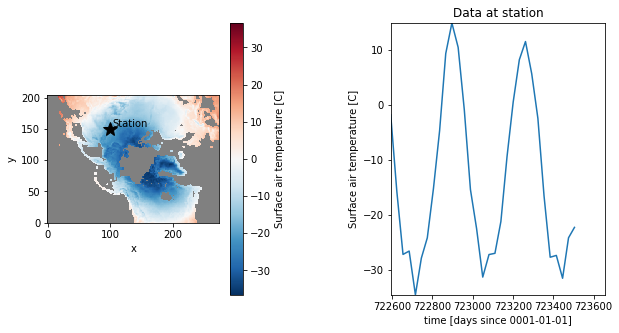

In [12]:
# some awesome static plot
import matplotlib.pyplot as plt

ds = xr.tutorial.open_dataset('rasm', decode_times=False).Tair
fig = plt.figure(figsize=[10,5])
tt = 30

station = dict(x=100, y=150)
ds_station = ds.sel(**station)

(ax1, ax2) = fig.subplots(ncols=2)
ds.isel(time=tt).plot(ax=ax1)
ax1.plot(station['x'], station['y'], marker='*', color='k' ,markersize=15)
ax1.text(station['x']+4, station['y']+4, 'Station', color='k' )
ax1.set_aspect(1)
ax1.set_facecolor('0.5')
ax1.set_title('');

# Time series
ds_station.isel(time=slice(0,tt+1)).plot.line(ax=ax2, x='time')
ax2.set_xlim(ds.time.min().data, ds.time.max().data)
ax2.set_ylim(ds_station.min(), ds_station.max())
ax2.set_title('Data at station');

fig.subplots_adjust(wspace=0.6)

All you need to do is wrap your plotting calls into a functions `func(ds, fig, frame)`, where ds is an xarray dataset you pass to `Movie`, fig is a matplotlib.figure handle and tt is the movie frame.

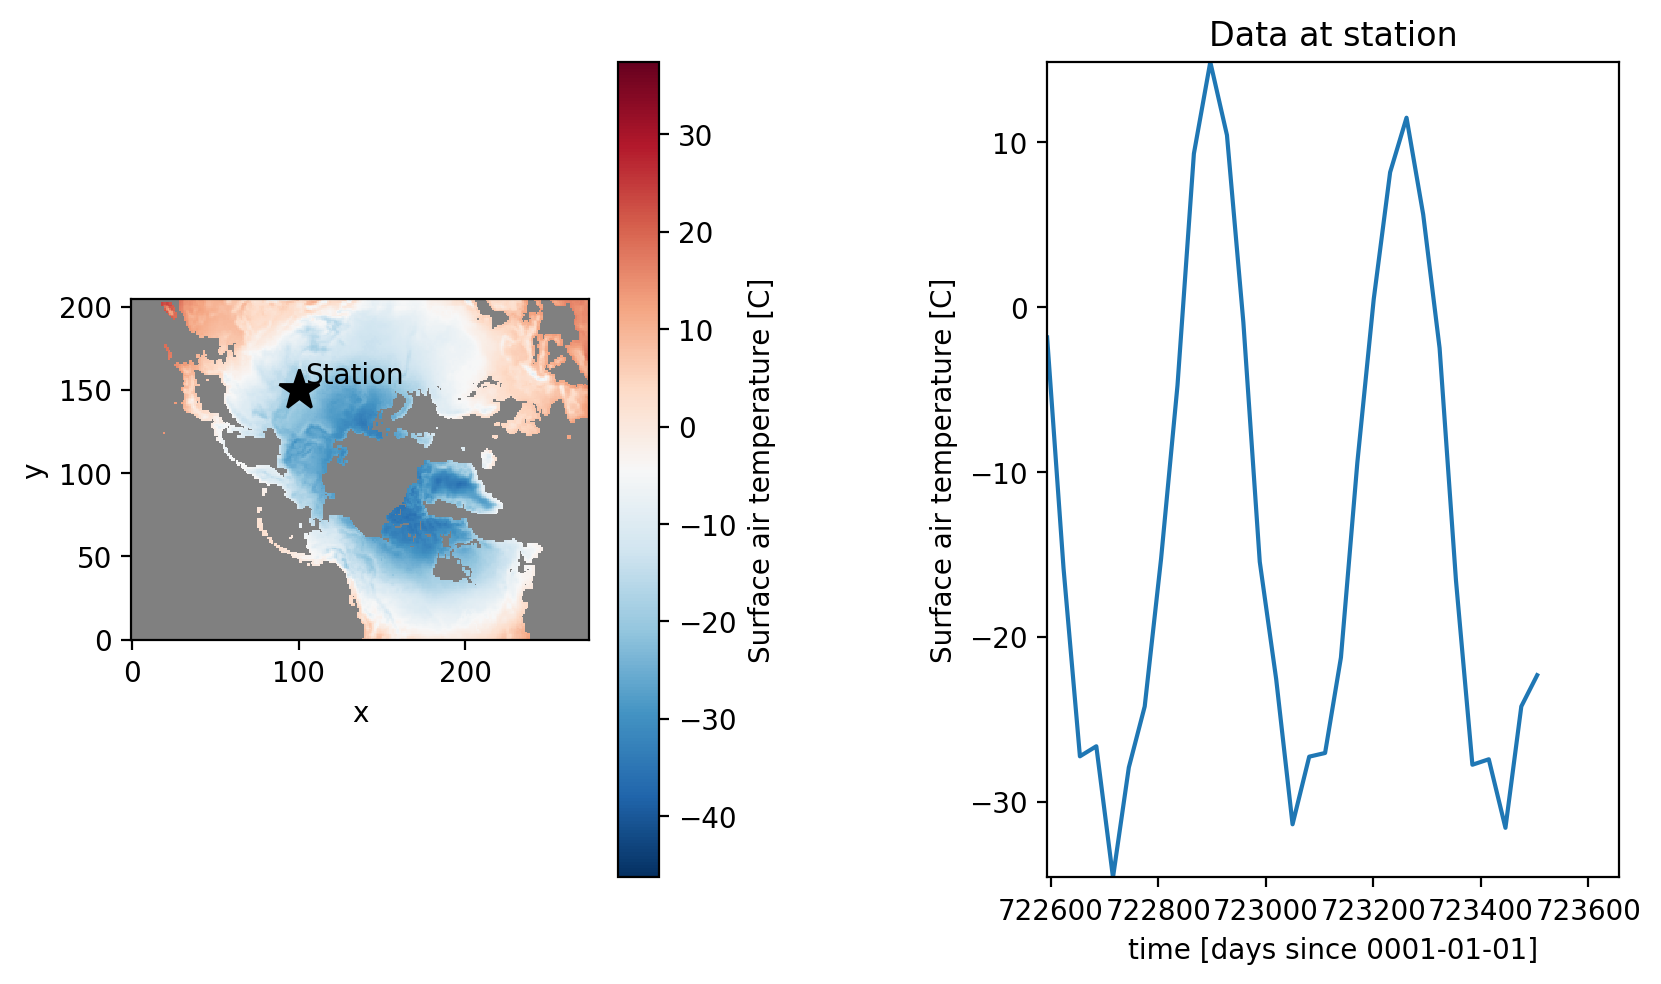

In [13]:
def custom_plotfunc(ds, fig, tt):
    # Define station location for timeseries
    station = dict(x=100, y=150)
    ds_station = ds.sel(**station)

    (ax1, ax2) = fig.subplots(ncols=2)
    
    # Map axis
    # Colorlimits need to be fixed or your video is going to cause seizures.
    # This is the only modification from the code above!
    ds.isel(time=tt).plot(ax=ax1, vmin=ds.min(), vmax=ds.max(), cmap='RdBu_r')
    ax1.plot(station['x'], station['y'], marker='*', color='k' ,markersize=15)
    ax1.text(station['x']+4, station['y']+4, 'Station', color='k' )
    ax1.set_aspect(1)
    ax1.set_facecolor('0.5')
    ax1.set_title('');

    # Time series
    ds_station.isel(time=slice(0,tt+1)).plot.line(ax=ax2, x='time')
    ax2.set_xlim(ds.time.min().data, ds.time.max().data)
    ax2.set_ylim(ds_station.min(), ds_station.max())
    ax2.set_title('Data at station');

    fig.subplots_adjust(wspace=0.6)
    return None, None #This is not strictly necessary, but otherwise a warning will be raised.  


mov_custom = Movie(ds, custom_plotfunc)
mov_custom.preview(30)

In [14]:
mov_custom.save('movie_custom.gif', progress=True) 


Movie created at movie_custom.mp4
GIF created at movie_custom.gif


![](movie_custom.gif)